In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
color_estimate = '#3288bd'
color_projection = '#d53e4f'
label_color = '#5D646F'
background_color = '#F3F7F7'

In [4]:
def hideBorders(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    
def retreivePlotValues(data):
    min_year = df["year"].min()
    max_year = df["year"].max()
    df.population /= 1000
    min_population = int(df["population"].min())
    max_population = int(df["population"].max())
    return min_year, max_year+2, min_population, max_population+2
    

D:\UCU\Course_3\AI\anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


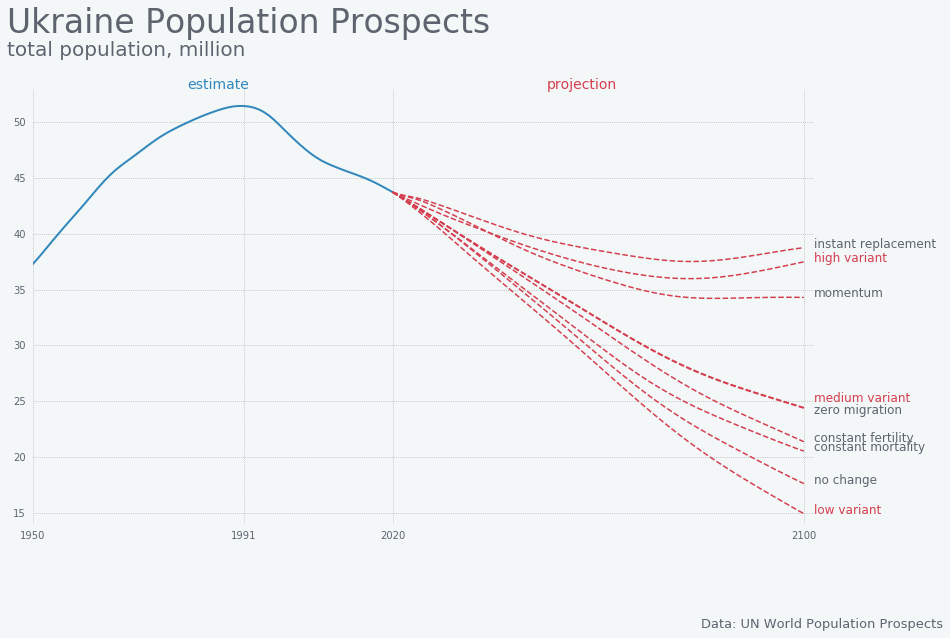

In [5]:
fig, ax = plt.subplots(figsize=(14,8), facecolor=background_color, edgecolor='black')
min_year, max_year, min_population, max_population = retreivePlotValues(df)
hideBorders(ax)
ax.set_facecolor(background_color)
ax.set_xticks([1950, 1991, 2020, 2100])
ax.tick_params(color=background_color, labelcolor=label_color)

plt.grid(linestyle=':')
plt.xlim(min_year, max_year)
plt.ylim(min_population, max_population)

labels = df["type"].unique()[1:]
colors = list()
for label in labels:
    if 'variant' in label:
        colors.append(color_projection)
    else:
         colors.append(label_color)
    
labels_positions = list()    
for label in labels:
    labels_positions.append(df[df['year']==2100][df['type']==label]['population'])
    
labels_positions[np.where(labels == 'medium variant')[0][0]] += 0.5
labels_positions[np.where(labels == 'zero migration')[0][0]] -= 0.5

plt.plot('year', 'population', data=df[df['type']=='estimate'], color=color_estimate , linewidth=2)
for label, color, y in zip(labels, colors, labels_positions):
    plt.plot('year', 'population', data=df[df['type']==label], color=color_projection, linestyle='--')
    plt.annotate(label, (2102, y), color=color, fontsize=12)
    
plt.text(min_year-5, max_population+5,'Ukraine Population Prospects', fontsize=33, color=label_color)
plt.text(min_year-5, max_population+3, 'total population, million', fontsize=20,  color=label_color)
plt.text(2080, min_population/3,'Data: UN World Population Prospects', fontsize=13, color=label_color)

plt.annotate('estimate', (1980, max_population),  color=color_estimate , fontsize=14)
plt.annotate('projection', (2050, max_population),  color=color_projection, fontsize=14)

plt.show()